In [1]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # for Chart and plot
import math # for floor function 

# File to Load 
clinicaltrial_data_to_load = "raw_data/clinicaltrial_data.csv"
mouse_drug_data_to_load = "raw_data/mouse_drug_data.csv"

# Read City and Ride Data File and store into Pandas Data Frames
clinicaltrial_data = pd.read_csv(clinicaltrial_data_to_load)
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data

# # # Combine the data into a single dataset
# Pymaceuticals_data_complete = pd.merge(city_data, ride_data, how="inner", on=["city", "city"])
# # city_ride_data_complete

FileNotFoundError: File b'raw_data/clinicaltrial_data.csv' does not exist

In [736]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City
rides_analysis = city_ride_data_complete
rides_analysis['rides'] = 0 
rides_analysis['drivers'] = 0
rides_analysis = rides_analysis.groupby(['city']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
rides_analysis = rides_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
# rides_analysis

In [737]:
# filter on Urban
Urban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Urban")]
# len(Urban)
# Urban

In [738]:
# filter on Suburban
Suburban = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Suburban")]
# len(Suburban)
# Suburban

In [739]:
# Filter on Rural
Rural = rides_analysis[rides_analysis["City Type"].notnull() & (rides_analysis["City Type"] == "Rural")]
# len(Rural)
# Rural

In [740]:
# Find the max and min of the 'Average Fare' to plot on y axis
rides_fare_average_min = rides_analysis["Average Fare"].min()
rides_fare_average_min

20.093157894736848

In [741]:
# Find the max of the 'Average Fare' to plot on y axis
rides_fare_average_max = rides_analysis["Average Fare"].max()
rides_fare_average_max

43.278333333333336

In [742]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_min = rides_analysis["Total Number of Rides"].min()
Total_Number_of_Rides_min

3

In [743]:
# Find the max and min of the 'Total Number of Rides' to plot on x axis
Total_Number_of_Rides_max = rides_analysis["Total Number of Rides"].max()
Total_Number_of_Rides_max

39

In [744]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
x_axis = np.arange(0, Total_Number_of_Rides_max+6, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40], dtype=int64)

In [745]:
# Create a list from 0 to 40 with each step being 0.1 higher than the last
y_axis = np.arange(math.floor( rides_fare_average_min ) - 5, math.floor(rides_fare_average_max) + 6, 5)
y_axis

array([15, 20, 25, 30, 35, 40, 45])

<IPython.core.display.Javascript object>


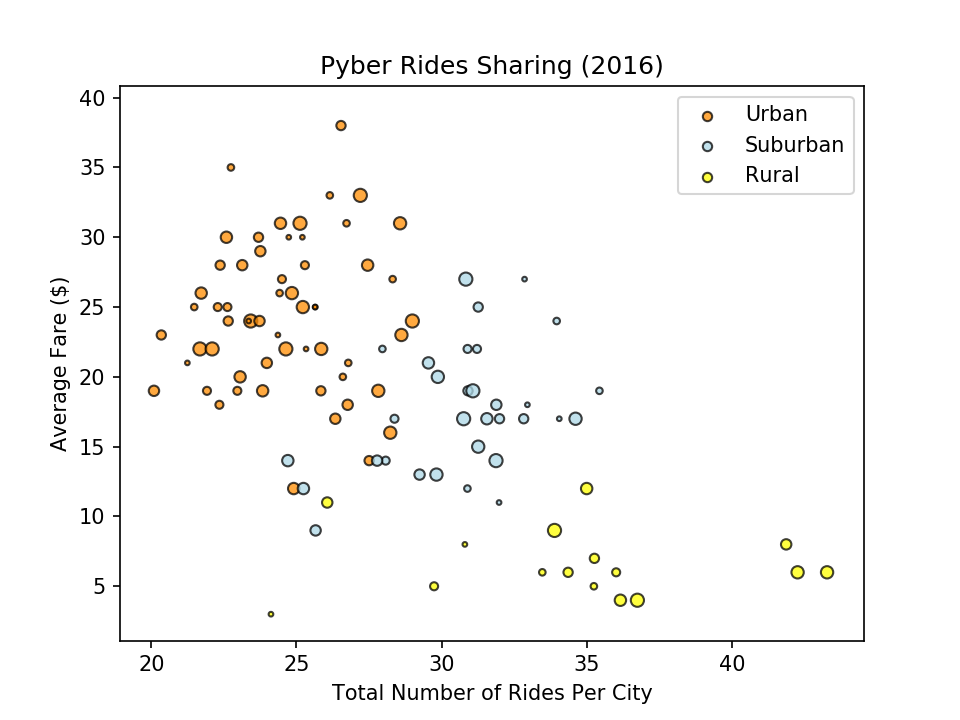

In [746]:
# Bubble Plot
plt.figure()

Urban = plt.scatter(Urban["Average Fare"],Urban["Total Number of Rides"], marker="o", facecolors="darkorange", edgecolors="black",
            s = x_axis, alpha=0.75, label="Urban")
Suburban = plt.scatter(Suburban["Average Fare"],Suburban["Total Number of Rides"], marker="o", facecolors="lightblue", edgecolors="black",
            s = x_axis, alpha=0.75, label="Suburban")
Rural = plt.scatter(Rural["Average Fare"],Rural["Total Number of Rides"], marker="o", facecolors="yellow", edgecolors="black",
            s = x_axis, alpha=0.75, label="Rural")
# interactive(True)
# plt.show()

In [748]:
# Add labels to the x and y axes
plt.title("Pyber Rides Sharing (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

Text(70.5833,0.5,'Average Fare ($)')

In [747]:
# Create a legend for the chart
plt.legend(handles=[Urban,Suburban,Rural], loc="best")

In [710]:
# Making the Pie

<IPython.core.display.Javascript object>


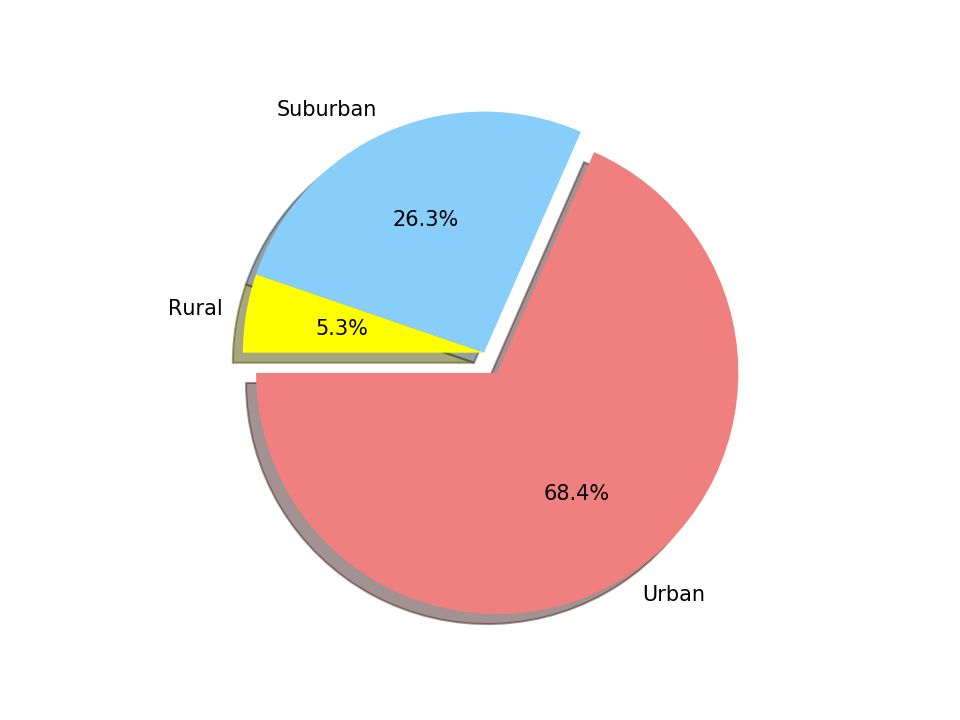

,Average Fare,date,Total Number of Rides,Total Number of Drivers,City Type
type,,,,,
Rural,34.623440,2018-01-01 09:45:36,125,9,Rural
Suburban,30.970128,2018-01-01 00:46:46,625,25,Suburban
Urban,24.525772,2018-01-01 00:08:16,1625,73,Urban


In [749]:
# Calculating $ Displaying Average Fare, date, Total Number of Rides, Total Number of Drivers based on City Type
plt.figure()

pie_analysis = city_ride_data_complete
pie_analysis['rides'] = 0 
pie_analysis['drivers'] = 0
pie_analysis = pie_analysis.groupby(['type']).agg({'fare':'mean'
                                   ,'date':'min'
                                   , 'rides':'size'
                                   ,'driver_count':'max'               
                                   ,'type':'min'})
pie_analysis = pie_analysis.rename(columns = {'fare' :'Average Fare'
                                 ,'rides' : 'Total Number of Rides'
                                 , 'driver_count' : 'Total Number of Drivers'
                                 , 'type' : 'City Type'
                                })
pie_analysis

In [731]:
#
total_rides = pie_analysis["Total Number of Rides"].sum()
total_urban_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Urban")]
total_Suburban_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Suburban")]
total_Rural_rides = pie_analysis[pie_analysis["City Type"].notnull() & (pie_analysis["City Type"] == "Rural")]
#
percent_urban_rides = total_urban_rides["Total Number of Rides"] * 100 /total_rides
percent_Suburban_rides = total_Suburban_rides["Total Number of Rides"] * 100 /total_rides
percent_Rural_rides = total_Rural_rides["Total Number of Rides"] * 100 /total_rides
# percent_Rural_rides

In [750]:
# Labels for the sections of our pie chart

labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [percent_urban_rides, percent_Suburban_rides, percent_Rural_rides]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [751]:
# Create the pie chart based upon the values above
# Automatically find the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

([<matplotlib.patches.Wedge at 0x292846fbb00>,
 [Text(0.656338,-1.0046,'Urban'),
  Text(-0.441865,1.00735,'Suburban'),
  Text(-1.085,0.181054,'Rural')],
 [Text(0.382864,-0.586016,'68.4%'),
  Text(-0.241017,0.549464,'26.3%'),
  Text(-0.591817,0.0987568,'5.3%')])

In [752]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# plt.savefig("images/PyPies.png")
# interactive(False)
# plt.show()

(-1.103307993026789,
 1.1694678535625695,
 -1.1948244543718165,
 1.1045154502081818)